In [1]:
from google.colab import files
uploaded = files.upload()


Saving Energy_consumption.csv to Energy_consumption.csv


In [2]:
import pandas as pd

df = pd.read_csv("Energy_consumption.csv")
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [3]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)

Shape: (1000, 11)

Columns:
 Index(['Timestamp', 'Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
       'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday',
       'EnergyConsumption'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


In [5]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['Month'] = df['Timestamp'].dt.month


In [6]:
df.isnull().sum()

,0
Timestamp,0
Temperature,0
Humidity,0
SquareFootage,0
Occupancy,0
HVACUsage,0
LightingUsage,0
RenewableEnergy,0
DayOfWeek,0
Holiday,0


In [7]:
df.describe()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption,Hour,Month
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,2022-01-21 19:29:59.999999744,24.982026,45.395412,1500.052488,4.581000,15.132813,77.055873,11.436000,1.25600
min,2022-01-01 00:00:00,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278,0.000000,1.00000
25%,2022-01-11 09:45:00,22.645070,38.297722,1247.108548,2.000000,7.628385,71.544690,5.000000,1.00000
50%,2022-01-21 19:30:00,24.751637,45.972116,1507.967426,5.000000,15.072296,76.943696,11.000000,1.00000
75%,2022-02-01 05:15:00,27.418174,52.420066,1740.340165,7.000000,22.884064,82.921742,17.000000,2.00000
max,2022-02-11 15:00:00,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120,23.000000,2.00000
std,NaN,2.836850,8.518905,288.418873,2.865598,8.745917,8.144112,6.913009,0.43664


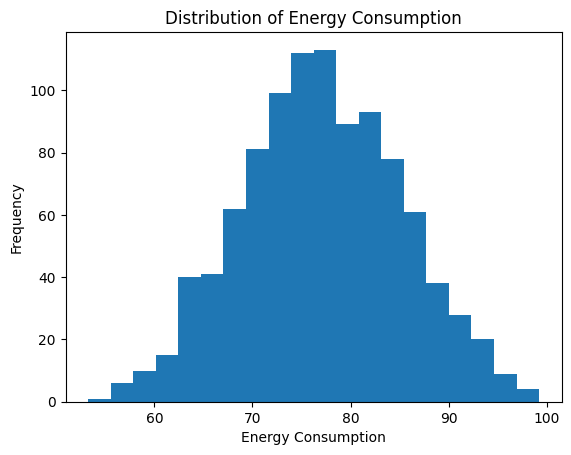

In [8]:
import matplotlib.pyplot as plt

plt.hist(df['EnergyConsumption'], bins=20)
plt.xlabel("Energy Consumption")
plt.ylabel("Frequency")
plt.title("Distribution of Energy Consumption")
plt.show()

Energy consumption values are mostly concentrated between 70 and 85 units, showing a near-normal distribution. This indicates stable energy usage

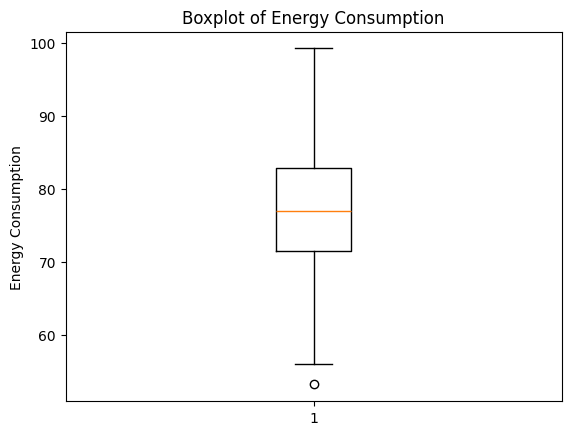

In [9]:
plt.boxplot(df['EnergyConsumption'])
plt.title("Boxplot of Energy Consumption")
plt.ylabel("Energy Consumption")
plt.show()

The median energy consumption lies around the mid-70s with moderate variability. A few outliers suggest occasional abnormal energy usage periods.

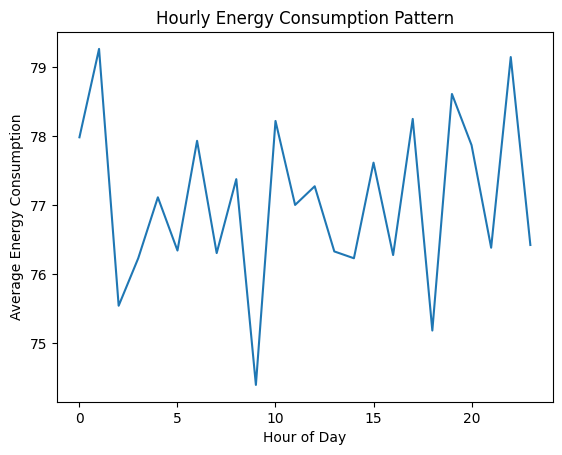

In [10]:
df.groupby('Hour')['EnergyConsumption'].mean().plot()
plt.xlabel("Hour of Day")
plt.ylabel("Average Energy Consumption")
plt.title("Hourly Energy Consumption Pattern")
plt.show()

Energy consumption varies throughout the day, with higher usage during active hours. Lower consumption is observed during early morning and late-night periods.

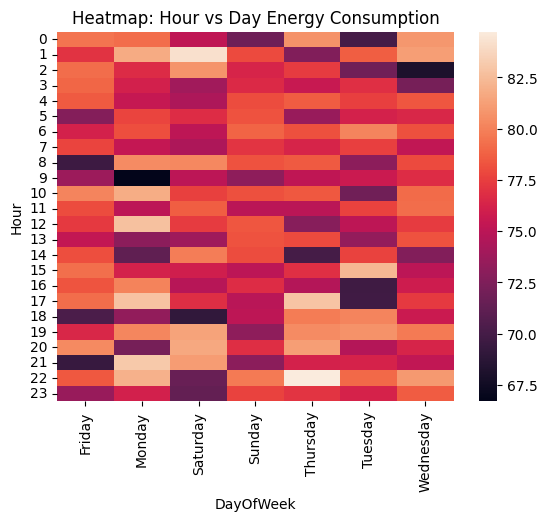

In [11]:
import seaborn as sns
pivot = df.pivot_table(values='EnergyConsumption',
                       index='Hour',
                       columns='DayOfWeek',
                       aggfunc='mean')

sns.heatmap(pivot)
plt.title("Heatmap: Hour vs Day Energy Consumption")
plt.show()

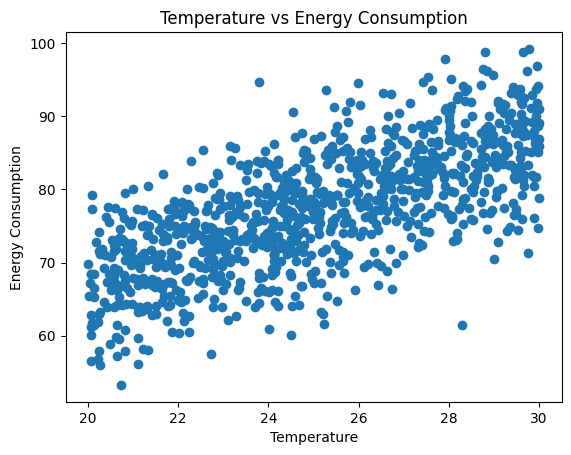

In [12]:
plt.scatter(df['Temperature'], df['EnergyConsumption'])
plt.xlabel("Temperature")
plt.ylabel("Energy Consumption")
plt.title("Temperature vs Energy Consumption")
plt.show()


Energy consumption increases as temperature rises, showing a strong positive relationship. This is mainly due to increased HVAC usage during higher temperatures.

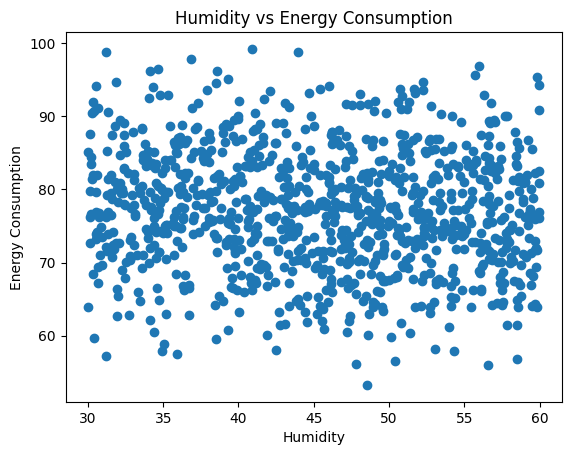

In [13]:
plt.scatter(df['Humidity'], df['EnergyConsumption'])
plt.xlabel("Humidity")
plt.ylabel("Energy Consumption")
plt.title("Humidity vs Energy Consumption")
plt.show()

No clear relationship is observed between humidity and energy consumption. This suggests humidity is not a major factor influencing energy usage.

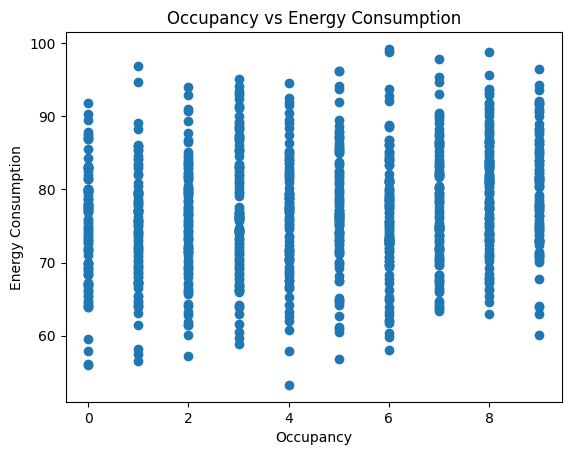

In [14]:
plt.scatter(df['Occupancy'], df['EnergyConsumption'])
plt.xlabel("Occupancy")
plt.ylabel("Energy Consumption")
plt.title("Occupancy vs Energy Consumption")
plt.show()


Energy consumption generally increases with higher occupancy levels.

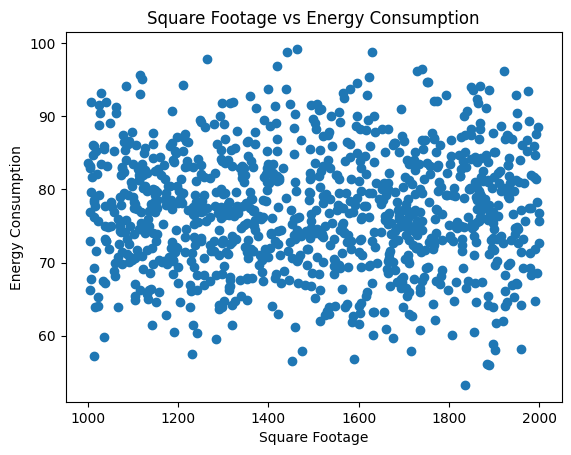

In [15]:
plt.scatter(df['SquareFootage'], df['EnergyConsumption'])
plt.xlabel("Square Footage")
plt.ylabel("Energy Consumption")
plt.title("Square Footage vs Energy Consumption")
plt.show()

Energy consumption generally increases with square footage, indicating larger homes consume more energy. However, the wide spread shows that size alone does not fully determine energy usage.

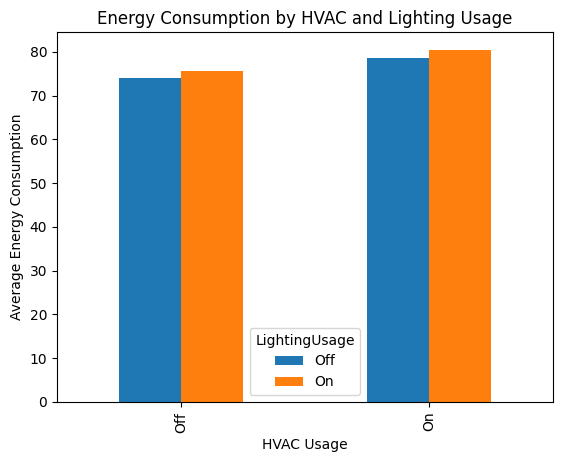

In [16]:
df.groupby(['HVACUsage','LightingUsage'])['EnergyConsumption'].mean().unstack().plot(kind='bar')
plt.xlabel("HVAC Usage")
plt.ylabel("Average Energy Consumption")
plt.title("Energy Consumption by HVAC and Lighting Usage")
plt.show()


Energy consumption is higher when HVAC is ON, especially with lighting also ON. This shows HVAC usage is a major contributor to overall energy demand.

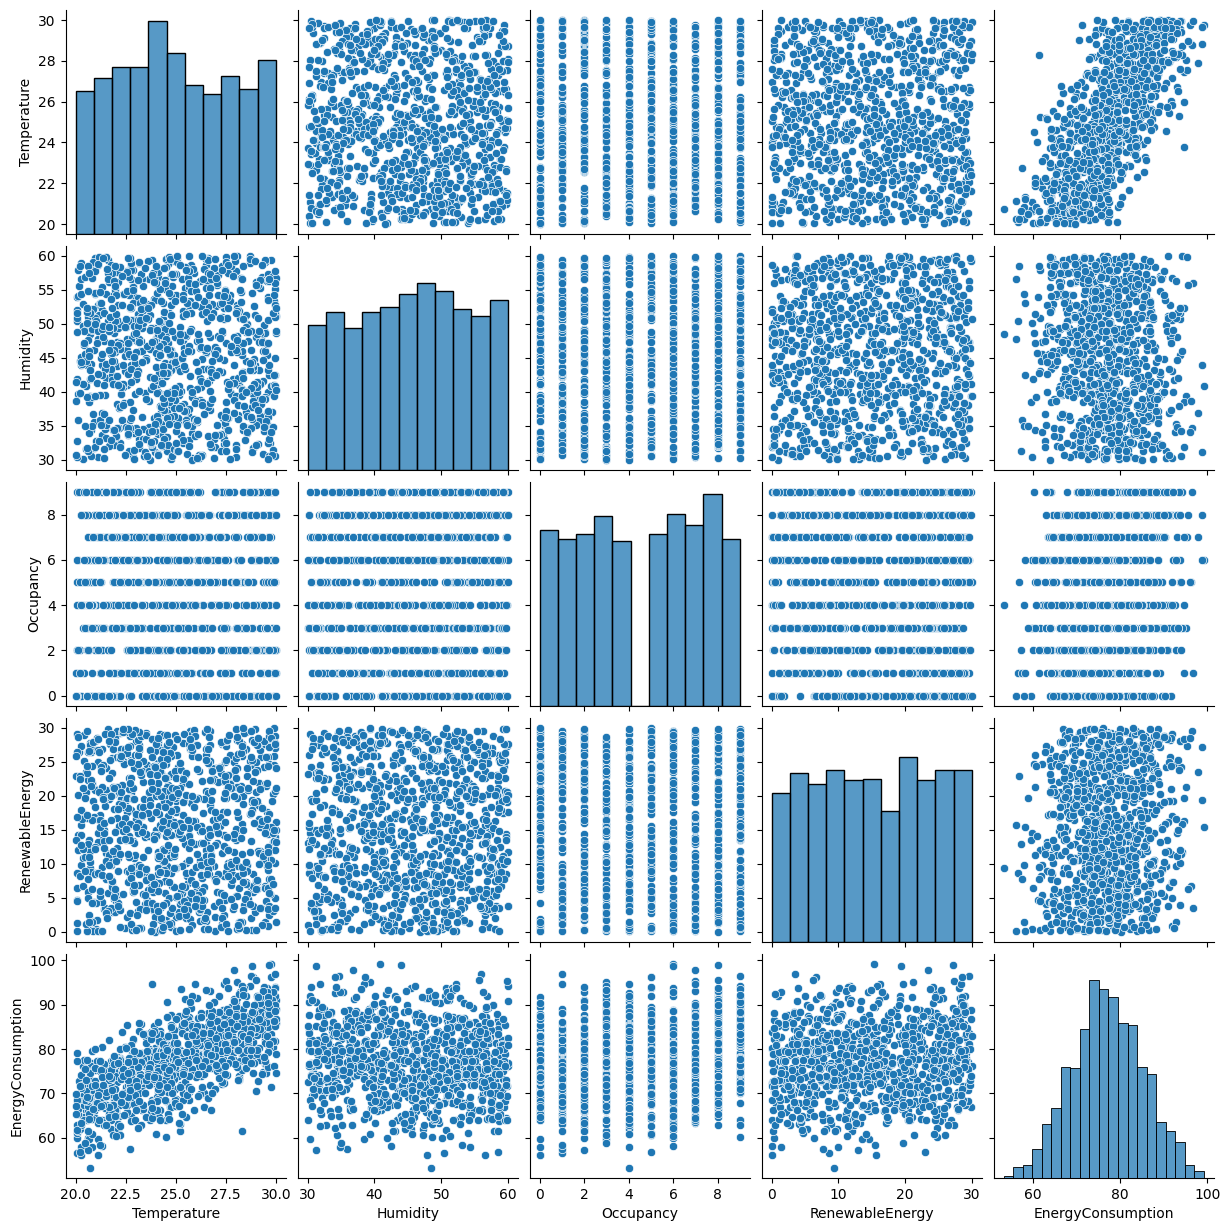

In [17]:
sns.pairplot(df[['Temperature','Humidity','Occupancy','RenewableEnergy','EnergyConsumption']])
plt.show()

Energy consumption shows a strong positive relationship with temperature, indicating higher cooling/heating demand as temperature rises.

Humidity has a weak to moderate influence on energy consumption, suggesting it plays a secondary role compared to temperature.

Occupancy displays a clear positive trend with energy usage, meaning more people directly increase power consumption.

Renewable energy availability shows a slight inverse or weak correlation with grid energy consumption, indicating partial offset of energy demand.

Temperature and humidity are moderately correlated, reflecting natural weather dependence rather than operational effects.

Occupancy remains largely independent of weather variables, showing human presence is driven by schedule, not climate.

Energy consumption distribution appears approximately normal, with most values concentrated in the mid-range and fewer extreme peaks.

Temperature values are evenly spread, suggesting the dataset covers diverse operating conditions

Temperature is the dominant factor influencing energy consumption.

Occupancy has a moderate impact, while humidity and renewable energy show minimal direct influence.

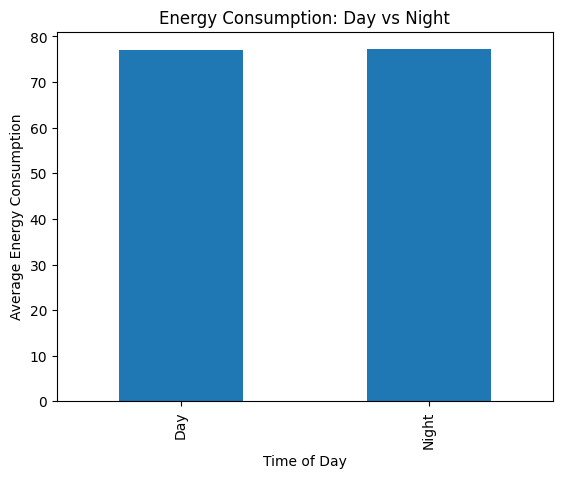

In [18]:
df['Day_Night'] = df['Hour'].apply(lambda x: 'Day' if 6 <= x < 18 else 'Night')

# Average energy for Day and Night
day_night_energy = df.groupby('Day_Night')['EnergyConsumption'].mean()

# Plot
plt.figure()
day_night_energy.plot(kind='bar')
plt.xlabel("Time of Day")
plt.ylabel("Average Energy Consumption")
plt.title("Energy Consumption: Day vs Night")
plt.show()


Average energy consumption is nearly the same during day and night. This suggests consistent usage patterns or continuous appliance operation.

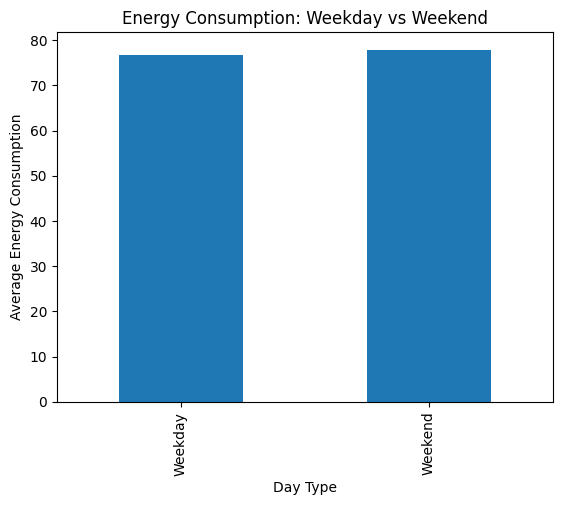

In [19]:
# Extract day of week (Monday=0, Sunday=6)
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek

# Create Weekday / Weekend column
df['Week_Type'] = df['DayOfWeek'].apply(
    lambda x: 'Weekend' if x >= 5 else 'Weekday'
)

# Average energy consumption
week_energy = df.groupby('Week_Type')['EnergyConsumption'].mean()

# Plot
plt.figure()
week_energy.plot(kind='bar')
plt.xlabel("Day Type")
plt.ylabel("Average Energy Consumption")
plt.title("Energy Consumption: Weekday vs Weekend")
plt.show()


Energy consumption is slightly higher on weekends compared to weekdays. This may be due to increased home occupancy and appliance usage during weekends

**FEATURE** **ENGINEERING**

In [20]:
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['DayOfWeek_num'] = df['Timestamp'].dt.dayofweek
df['IsWeekend'] = (df['DayOfWeek_num'] >= 5).astype(int)
df[['Timestamp','Hour','Day','Month','DayOfWeek_num','IsWeekend']].head()

,Timestamp,Hour,Day,Month,DayOfWeek_num,IsWeekend
0,2022-01-01 00:00:00,0,1,1,5,1
1,2022-01-01 01:00:00,1,1,1,5,1
2,2022-01-01 02:00:00,2,1,1,5,1
3,2022-01-01 03:00:00,3,1,1,5,1
4,2022-01-01 04:00:00,4,1,1,5,1


In [21]:
import numpy as np
df['Hour'] = df['Timestamp'].dt.hour
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)
df[['Hour', 'Hour_sin','Hour_cos']].head()

,Hour,Hour_sin,Hour_cos
0,0,0.000000,1.000000
1,1,0.258819,0.965926
2,2,0.500000,0.866025
3,3,0.707107,0.707107
4,4,0.866025,0.500000


In [22]:
df['Energy_lag_1'] = df['EnergyConsumption'].shift(1)
df['Energy_lag_24'] = df['EnergyConsumption'].shift(24)
df[['EnergyConsumption', 'Energy_lag_1','Energy_lag_24']].head(30)


,EnergyConsumption,Energy_lag_1,Energy_lag_24
0,75.364373,NaN,NaN
1,83.401855,75.364373,NaN
2,78.270888,83.401855,NaN
3,56.519850,78.270888,NaN
4,70.811732,56.519850,NaN
5,84.321885,70.811732,NaN
6,76.165791,84.321885,NaN
7,74.131906,76.165791,NaN
8,78.206236,74.131906,NaN
9,77.992214,78.206236,NaN


In [23]:
df['Energy_roll_mean_3'] = (
    df['EnergyConsumption']
    .shift(1)
    .rolling(window=3)
    .mean()
)
df['Energy_roll_mean_24'] = (
    df['EnergyConsumption']
    .shift(1)
    .rolling(window=24)
    .mean()
)

df[['EnergyConsumption', 'Energy_roll_mean_3','Energy_roll_mean_24']].head(30)


,EnergyConsumption,Energy_roll_mean_3,Energy_roll_mean_24
0,75.364373,NaN,NaN
1,83.401855,NaN,NaN
2,78.270888,NaN,NaN
3,56.519850,79.012372,NaN
4,70.811732,72.730864,NaN
5,84.321885,68.534157,NaN
6,76.165791,70.551156,NaN
7,74.131906,77.099803,NaN
8,78.206236,78.206527,NaN
9,77.992214,76.167978,NaN


In [24]:
df['Energy_change'] = (
    df['EnergyConsumption'].shift(1) -
    df['EnergyConsumption'].shift(2)
)

df[['EnergyConsumption', 'Energy_change']].head(10)
df['Energy_change'] = (
    df['EnergyConsumption'].shift(1) -
    df['EnergyConsumption'].shift(2)
)

df[['EnergyConsumption', 'Energy_change']].head(10)


,EnergyConsumption,Energy_change
0,75.364373,NaN
1,83.401855,NaN
2,78.270888,8.037482
3,56.519850,-5.130967
4,70.811732,-21.751037
5,84.321885,14.291882
6,76.165791,13.510153
7,74.131906,-8.156094
8,78.206236,-2.033885
9,77.992214,4.074330


In [25]:
df['HVAC_num'] = df['HVACUsage'].map({'On': 1, 'Off': 0})
df['Lighting_num'] = df['LightingUsage'].map({'On': 1, 'Off': 0})

df[['HVACUsage', 'HVAC_num', 'LightingUsage', 'Lighting_num']].head()


,HVACUsage,HVAC_num,LightingUsage,Lighting_num
0,On,1,Off,0
1,On,1,On,1
2,Off,0,Off,0
3,Off,0,On,1
4,On,1,Off,0


In [26]:
df['HVAC_lag_1'] = df['HVAC_num'].shift(1)
df['HVAC_roll_mean_6'] = (
    df['HVAC_num']
    .shift(1)
    .rolling(6)
    .mean()
)
df[['HVAC_num', 'HVAC_lag_1','HVAC_roll_mean_6']].head(10)


,HVAC_num,HVAC_lag_1,HVAC_roll_mean_6
0,1,NaN,NaN
1,1,1.0,NaN
2,0,1.0,NaN
3,0,0.0,NaN
4,1,0.0,NaN
5,0,1.0,NaN
6,1,0.0,0.500000
7,0,1.0,0.500000
8,1,0.0,0.333333
9,1,1.0,0.500000


In [27]:
df['Lighting_lag_1'] = df['Lighting_num'].shift(1)
df['Lighting_roll_mean_6'] = (
    df['Lighting_num']
    .shift(1)
    .rolling(6)
    .mean()
)
df[['Lighting_num', 'Lighting_lag_1','Lighting_roll_mean_6']].head(10)



,Lighting_num,Lighting_lag_1,Lighting_roll_mean_6
0,0,NaN,NaN
1,1,0.0,NaN
2,0,1.0,NaN
3,1,0.0,NaN
4,0,1.0,NaN
5,0,0.0,NaN
6,0,0.0,0.333333
7,0,0.0,0.333333
8,0,0.0,0.166667
9,0,0.0,0.166667


In [28]:
df['HVAC_usage_freq_12'] = (
    df['HVAC_num']
    .shift(1)
    .rolling(12)
    .mean()
)
df['Lighting_usage_freq_12'] = (
    df['Lighting_num']
    .shift(1)
    .rolling(12)
    .mean()
)
df[['HVAC_num', 'HVAC_usage_freq_12','Lighting_usage_freq_12']].tail(15)


,HVAC_num,HVAC_usage_freq_12,Lighting_usage_freq_12
985,0,0.250000,0.666667
986,0,0.250000,0.666667
987,1,0.250000,0.666667
988,1,0.250000,0.583333
989,0,0.333333,0.666667
990,1,0.333333,0.666667
991,0,0.416667,0.666667
992,0,0.333333,0.666667
993,1,0.333333,0.583333
994,1,0.333333,0.500000


In [29]:
df['HVAC_Temp_interaction'] = (
    df['HVAC_num'].shift(1) *
    df['Temperature'].shift(1)
)

df[['HVAC_Temp_interaction']].head(10)


,HVAC_Temp_interaction
0,NaN
1,25.139433
2,27.731651
3,0.000000
4,0.000000
5,23.097359
6,0.000000
7,25.131167
8,0.000000
9,25.391999


In [30]:
df['Lighting_Occ_interaction'] = (
    df['Lighting_num'].shift(1) *
    df['Occupancy'].shift(1)
)

df[['Lighting_Occ_interaction']].head(10)


,Lighting_Occ_interaction
0,NaN
1,0.0
2,1.0
3,0.0
4,1.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [31]:
df = df.dropna()


In [32]:
corr = df.corr(numeric_only=True)
energy_corr = corr['EnergyConsumption'].sort_values(ascending=False)

energy_corr

,EnergyConsumption
EnergyConsumption,1.000000
Temperature,0.691632
HVAC_num,0.282653
Occupancy,0.186187
Lighting_num,0.091087
RenewableEnergy,0.077720
IsWeekend,0.068741
DayOfWeek_num,0.063409
DayOfWeek,0.063409
Energy_roll_mean_24,0.042202


In [33]:
numeric_df = df.select_dtypes(include=['int64','float64'])

corr = numeric_df.corr()

energy_corr = corr['EnergyConsumption'].drop('EnergyConsumption')

energy_corr_sorted = energy_corr.abs().sort_values(ascending=False)

energy_corr_sorted.head(5)


,EnergyConsumption
Temperature,0.691632
HVAC_num,0.282653
Occupancy,0.186187
Humidity,0.105179
Lighting_num,0.091087


In [34]:
final_features = [
    # Time
    'Hour', 'Hour_sin', 'Hour_cos', 'IsWeekend',

    # Energy history (MOST IMPORTANT)
    'Energy_lag_1',
    'Energy_lag_24',
    'Energy_roll_mean_3',
    'Energy_roll_mean_24',

    # HVAC / Lighting / Occupancy (PAST ONLY)
    'HVAC_lag_1',
    'HVAC_roll_mean_6',
    'Lighting_lag_1',
    'Lighting_roll_mean_6',
    'Occupancy_lag_1',

    # Weather (PAST ONLY)
    'Temp_lag_1',
    'Humidity_lag_1'
]


In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
try:
    df.head()
except NameError:
    print("df not found, loading 'Energy_consumption.csv'")
    df = pd.read_csv("Energy_consumption.csv")

# Convert 'Timestamp' to datetime if not already
if 'Timestamp' in df.columns and not pd.api.types.is_datetime64_any_dtype(df['Timestamp']):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Time-based features
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['DayOfWeek_num'] = df['Timestamp'].dt.dayofweek
df['IsWeekend'] = (df['DayOfWeek_num'] >= 5).astype(int)

# Cyclical features for Hour
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)

# Lagged energy consumption
df['Energy_lag_1'] = df['EnergyConsumption'].shift(1)
df['Energy_lag_24'] = df['EnergyConsumption'].shift(24)

# Rolling mean energy consumption
df['Energy_roll_mean_3'] = df['EnergyConsumption'].shift(1).rolling(window=3).mean()
df['Energy_roll_mean_24'] = df['EnergyConsumption'].shift(1).rolling(window=24).mean()

# Binary encoding for HVAC and Lighting usage
df['HVAC_num'] = df['HVACUsage'].map({'On': 1, 'Off': 0})
df['Lighting_num'] = df['LightingUsage'].map({'On': 1, 'Off': 0})

# Lagged and rolling mean for HVAC and Lighting usage
df['HVAC_lag_1'] = df['HVAC_num'].shift(1)
df['HVAC_roll_mean_6'] = df['HVAC_num'].shift(1).rolling(6).mean()
df['Lighting_lag_1'] = df['Lighting_num'].shift(1)
df['Lighting_roll_mean_6'] = df['Lighting_num'].shift(1).rolling(6).mean()

# Lagged features for Occupancy, Temperature, Humidity
df['Occupancy_lag_1'] = df['Occupancy'].shift(1)
df['Temp_lag_1'] = df['Temperature'].shift(1)
df['Humidity_lag_1'] = df['Humidity'].shift(1)

# Define the list of features for the model
features = [
    'Hour', 'Hour_sin', 'Hour_cos',
    'IsWeekend',
    'Energy_lag_1',
    'Energy_lag_24',
    'Energy_roll_mean_3',
    'Energy_roll_mean_24',
    'HVAC_lag_1',
    'HVAC_roll_mean_6',
    'Lighting_lag_1',
    'Lighting_roll_mean_6',
    'Occupancy_lag_1',
    'Temp_lag_1',
    'Humidity_lag_1'
]

# Create df_model with the selected features and drop rows with NaN values resulting from shift/rolling operations
df_model = df[features + ['EnergyConsumption']].dropna()

# --- End of feature re-creation ---

# Prepare X and y for train-test split
X = df_model.drop(columns=['EnergyConsumption'])
y = df_model['EnergyConsumption']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (761, 15)
X_test shape: (191, 15)
y_train shape: (761,)
y_test shape: (191,)


In [36]:
features = [
    'Hour', 'Hour_sin', 'Hour_cos',
    'IsWeekend',

    'Energy_lag_1',
    'Energy_lag_24',
    'Energy_roll_mean_3',
    'Energy_roll_mean_24',

    'HVAC_lag_1',
    'HVAC_roll_mean_6',

    'Lighting_lag_1',
    'Lighting_roll_mean_6',

    'Occupancy_lag_1',
]


In [37]:

if 'Timestamp' in df.columns and not pd.api.types.is_datetime64_any_dtype(df['Timestamp']):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Time-based features
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['DayOfWeek_num'] = df['Timestamp'].dt.dayofweek
df['IsWeekend'] = (df['DayOfWeek_num'] >= 5).astype(int)

# Cyclical features for Hour
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)

# Lagged energy consumption
df['Energy_lag_1'] = df['EnergyConsumption'].shift(1)
df['Energy_lag_24'] = df['EnergyConsumption'].shift(24)

# Rolling mean energy consumption
df['Energy_roll_mean_3'] = df['EnergyConsumption'].shift(1).rolling(window=3).mean()
df['Energy_roll_mean_24'] = df['EnergyConsumption'].shift(1).rolling(window=24).mean()

# Binary encoding for HVAC and Lighting usage (assuming HVACUsage, LightingUsage are 'On'/'Off')
df['HVAC_num'] = df['HVACUsage'].map({'On': 1, 'Off': 0})
df['Lighting_num'] = df['LightingUsage'].map({'On': 1, 'Off': 0})

# Lagged and rolling mean for HVAC and Lighting usage
df['HVAC_lag_1'] = df['HVAC_num'].shift(1)
df['HVAC_roll_mean_6'] = df['HVAC_num'].shift(1).rolling(6).mean()
df['Lighting_lag_1'] = df['Lighting_num'].shift(1)
df['Lighting_roll_mean_6'] = df['Lighting_num'].shift(1).rolling(6).mean()

# Missing lagged features previously identified or part of 'features' list
df['Occupancy_lag_1'] = df['Occupancy'].shift(1)
df['Temp_lag_1'] = df['Temperature'].shift(1)
df['Humidity_lag_1'] = df['Humidity'].shift(1)

# Define the list of features for the model
features = [
    'Hour', 'Hour_sin', 'Hour_cos',
    'IsWeekend',
    'Energy_lag_1',
    'Energy_lag_24',
    'Energy_roll_mean_3',
    'Energy_roll_mean_24',
    'HVAC_lag_1',
    'HVAC_roll_mean_6',
    'Lighting_lag_1',
    'Lighting_roll_mean_6',
    'Occupancy_lag_1',
    'Temp_lag_1',
    'Humidity_lag_1'
]

# Create df_model with the selected features and drop rows with NaN values resulting from shift/rolling operations
df_model = df[features + ['EnergyConsumption']].dropna()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np


In [65]:

X = df.select_dtypes(include=['int64', 'float64', 'bool'])
y = df['EnergyConsumption']
df_model = X.copy()
df_model['EnergyConsumption'] = y
df_model = df_model.dropna()
X_clean = df_model.drop(columns=['EnergyConsumption'])
y_clean = df_model['EnergyConsumption']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42
)


MODEL TRAINING

In [40]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression")
print("R2:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linear Regression
R2: 0.626879353471723
MAE: 4.306923076032728
RMSE: 5.223948957317585


In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree")
print("R2:", r2_score(y_test, y_pred_dt))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))


Decision Tree
R2: 0.06314276039810374
MAE: 6.678431696257414
RMSE: 8.277724971008984


In [43]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest")
print("R2:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest
R2: 0.5759785119201829
MAE: 4.533703985627121
RMSE: 5.568884583468513


In [44]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

xgb = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost")
print("R2:", r2_score(y_test, y_pred_xgb))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))



XGBoost
R2: 0.5575113978904738
MAE: 4.648702276365841
RMSE: 5.68886107744169


In [45]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(
    n_estimators=200,
    learning_rate=0.05,
    random_state=42
)

lgbm.fit(X_train, y_train)

y_pred_lgbm = lgbm.predict(X_test)

print("LightGBM")
print("R2:", r2_score(y_test, y_pred_lgbm))
print("MAE:", mean_absolute_error(y_test, y_pred_lgbm))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lgbm)))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3031
[LightGBM] [Info] Number of data points in the train set: 761, number of used features: 26
[LightGBM] [Info] Start training from score 76.990994
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [46]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

model_summary = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Decision Tree",
        "Random Forest",
        "XGBoost",
        "LightGBM"
    ],
    "R2 Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_xgb),
        r2_score(y_test, y_pred_lgbm)
    ],
    "MAE": [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_dt),
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_xgb),
        mean_absolute_error(y_test, y_pred_lgbm)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_dt)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
        np.sqrt(mean_squared_error(y_test, y_pred_lgbm))
    ]
})

model_summary


,Model,R2 Score,MAE,RMSE
0,Linear Regression,0.626879,4.306923,5.223949
1,Decision Tree,0.063143,6.678432,8.277725
2,Random Forest,0.575979,4.533704,5.568885
3,XGBoost,0.557511,4.648702,5.688861
4,LightGBM,0.548628,4.619497,5.745682


In [47]:
final_model = LinearRegression



In [48]:
final_model=lr
final_model.fit(X_train,y_train)



LinearRegression()

In [49]:
y_pred = final_model.predict(X_test)


In [50]:
import pickle

with open("energy_consumption_model.pkl", "wb") as f:
    pickle.dump(final_model, f)


In [51]:
with open("energy_consumption_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

loaded_model.predict(X_test[:5])


array([88.19340161, 76.85474558, 66.86911922, 80.05090182, 70.87607041])

In [52]:
print("Actual values:", y_test[:5].values)
print("Predicted values:", loaded_model.predict(X_test[:5]))


Actual values: [92.52121147 70.11778995 58.82047314 75.74823227 74.84384966]
Predicted values: [88.19340161 76.85474558 66.86911922 80.05090182 70.87607041]


In [53]:
print(type(final_model))


<class 'sklearn.linear_model._base.LinearRegression'>


In [54]:
print("Coefficients:", final_model.coef_)
print("Intercept:", final_model.intercept_)


Coefficients: [ 1.93923892e+00 -4.75360222e-02 -3.49694338e-04  5.26939899e-01
  6.63296483e-02  2.55175311e-01  7.62014778e-02  1.55542618e-01
  4.59634034e-02 -9.80714280e-03 -1.52681776e-01  1.04604543e-01
 -2.12994095e-02  4.59846129e+00  1.81675690e+00 -2.23602077e+00
  1.40452812e+00  7.38227936e-01 -9.64469863e-01 -7.19072145e-01
 -9.32286477e-02  5.08395067e-02 -1.67357769e-02 -5.32382375e-02
  5.96167124e-03 -1.58167842e-02]
Intercept: 26.71106272169908


In [55]:
try:
    print("Feature names:", final_model.feature_names_in_)
except AttributeError:
    print("Feature names not stored in this model")


Feature names: ['Temperature' 'Humidity' 'SquareFootage' 'Occupancy' 'RenewableEnergy'
 'IsWeekend' 'Hour_sin' 'Hour_cos' 'Energy_lag_1' 'Energy_lag_24'
 'Energy_roll_mean_3' 'Energy_roll_mean_24' 'Energy_change' 'HVAC_num'
 'Lighting_num' 'HVAC_lag_1' 'HVAC_roll_mean_6' 'Lighting_lag_1'
 'Lighting_roll_mean_6' 'HVAC_usage_freq_12' 'Lighting_usage_freq_12'
 'HVAC_Temp_interaction' 'Lighting_Occ_interaction' 'Occupancy_lag_1'
 'Temp_lag_1' 'Humidity_lag_1']


In [56]:
predictions = lr.predict(X_test)
print(predictions[:10])  # see first 10 predictions


[88.19340161 76.85474558 66.86911922 80.05090182 70.87607041 71.80543023
 79.49819483 73.19974473 83.43485597 84.47674246]


In [57]:
import pandas as pd

# Convert predictions to a DataFrame
pred_df = pd.DataFrame(predictions, columns=['Predicted_Energy'])

# Save as CSV
pred_df.to_csv('predictions.csv', index=False)


In [58]:
import pandas as pd

result_df = X_test.copy()
result_df['Actual_Energy'] = y_test.values
result_df['Predicted_Energy'] = predictions

result_df.to_csv('energy_predictions_full.csv', index=False)


In [59]:
pickle.load(open('energy_consumption_model.pkl', 'rb'))


LinearRegression()

In [60]:
model = pickle.load(open('energy_consumption_model.pkl', 'rb'))

print(model)
print(model.coef_)
print(model.intercept_)
print(model.feature_names_in_)


LinearRegression()
[ 1.93923892e+00 -4.75360222e-02 -3.49694338e-04  5.26939899e-01
  6.63296483e-02  2.55175311e-01  7.62014778e-02  1.55542618e-01
  4.59634034e-02 -9.80714280e-03 -1.52681776e-01  1.04604543e-01
 -2.12994095e-02  4.59846129e+00  1.81675690e+00 -2.23602077e+00
  1.40452812e+00  7.38227936e-01 -9.64469863e-01 -7.19072145e-01
 -9.32286477e-02  5.08395067e-02 -1.67357769e-02 -5.32382375e-02
  5.96167124e-03 -1.58167842e-02]
26.71106272169908
['Temperature' 'Humidity' 'SquareFootage' 'Occupancy' 'RenewableEnergy'
 'IsWeekend' 'Hour_sin' 'Hour_cos' 'Energy_lag_1' 'Energy_lag_24'
 'Energy_roll_mean_3' 'Energy_roll_mean_24' 'Energy_change' 'HVAC_num'
 'Lighting_num' 'HVAC_lag_1' 'HVAC_roll_mean_6' 'Lighting_lag_1'
 'Lighting_roll_mean_6' 'HVAC_usage_freq_12' 'Lighting_usage_freq_12'
 'HVAC_Temp_interaction' 'Lighting_Occ_interaction' 'Occupancy_lag_1'
 'Temp_lag_1' 'Humidity_lag_1']


In [64]:
result_df = X_test.copy()
result_df['Timestamp'] = df.loc[X_test.index, 'Timestamp']

result_df['Actual_Energy'] = y_test.values
result_df['Predicted_Energy'] = y_pred

result_df.to_csv('final_predictions.csv', index=False)
